# Linear Regression Model

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import math

# No Bias Data Set

In [120]:
ts = '9026'
sim_type = 'logit'

path = os.path.join(os.getcwd(), "simulation_data")
folder_path = os.path.join(path, "%s_%s_data" % (ts, sim_type))
listing = ts + "_" + sim_type + "_rawdata.csv"
path = os.path.join(folder_path, listing)
print(path)

df_nb = pd.read_csv(path,header=None).T
df_nb.head()

/Users/saniyavaidya/Documents/4580_final_project/simulation_data/9026_logit_data/9026_logit_rawdata.csv


,0,1,2,3,4,5
0,-8.0,1.0,0.578173,0.780000,0.875385,0.835897
1,-8.0,1.0,0.586394,0.754286,0.820769,0.817949
2,-8.0,1.0,0.590096,0.751429,0.837692,0.943590
3,-8.0,1.0,0.566106,0.761978,0.857692,0.889744
4,-8.0,1.0,0.584760,0.747033,0.823846,0.915385


In [125]:
df_nb = df_nb.rename(columns={0: "alpha", 1: "gamma", 2: "% Men in J", 3: "% Men in M", 4: "% Men in S" , 5: "% Men in E"})
df_nb['bias'] = (math.e**df_nb['alpha']) / (1+math.e**df_nb['alpha'])
df_nb.head()

,alpha,gamma,% Men in J,% Men in M,% Men in S,% Men in E,bias
0,-8.0,1.0,0.578173,0.780000,0.875385,0.835897,0.000335
1,-8.0,1.0,0.586394,0.754286,0.820769,0.817949,0.000335
2,-8.0,1.0,0.590096,0.751429,0.837692,0.943590,0.000335
3,-8.0,1.0,0.566106,0.761978,0.857692,0.889744,0.000335
4,-8.0,1.0,0.584760,0.747033,0.823846,0.915385,0.000335


In [132]:
mean_nb = df_nb.mean()
std_nb = df_nb.std()
hw_nb = 1.96*std_nb/math.sqrt(len(df_nb))

# Biased Dataset

In [130]:
ts = '71704'
sim_type = 'logit'

path = os.path.join(os.getcwd(), "simulation_data")
folder_path = os.path.join(path, "%s_%s_data" % (ts, sim_type))
listing = ts + "_" + sim_type + "_rawdata.csv"
path = os.path.join(folder_path, listing)
print(path)

df_b = pd.read_csv(path,header=None).T
df_b.head()

/Users/saniyavaidya/Documents/4580_final_project/simulation_data/71704_logit_data/71704_logit_rawdata.csv


,0,1,2,3,4,5
0,8.0,1.0,0.587115,0.787033,0.907692,0.976923
1,8.0,1.0,0.574808,0.775165,0.910000,0.956410
2,8.0,1.0,0.569808,0.761758,0.900769,0.966667
3,8.0,1.0,0.574231,0.737363,0.856923,0.961538
4,8.0,1.0,0.573125,0.751648,0.840000,0.976923


In [131]:
df_b = df_b.rename(columns={0: "alpha", 1: "gamma", 2: "% Men in J", 3: "% Men in M", 4: "% Men in S" , 5: "% Men in E"})
df_b['bias'] = (math.e**df_b['alpha']) / (1+math.e**df_b['alpha'])
df_b.head()

,alpha,gamma,% Men in J,% Men in M,% Men in S,% Men in E,bias
0,8.0,1.0,0.587115,0.787033,0.907692,0.976923,0.999665
1,8.0,1.0,0.574808,0.775165,0.910000,0.956410,0.999665
2,8.0,1.0,0.569808,0.761758,0.900769,0.966667,0.999665
3,8.0,1.0,0.574231,0.737363,0.856923,0.961538,0.999665
4,8.0,1.0,0.573125,0.751648,0.840000,0.976923,0.999665


In [133]:
mean_b = df_b.mean()
std_b = df_b.std()
hw_b = 1.96*std_b/math.sqrt(len(df_b))

# Bias vs. No Bias Comparison

([<matplotlib.axis.XTick at 0x7fa9881106d0>,
 [Text(1, 0, 'J'), Text(2, 0, 'M'), Text(3, 0, 'S'), Text(4, 0, 'E')])

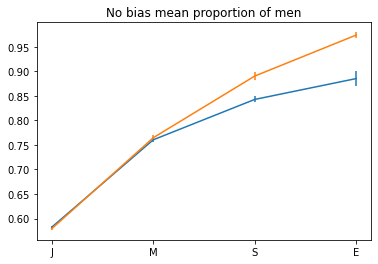

In [134]:
x = [1,2,3,4]
plt.errorbar(x=x, y=mean_nb[2:6], yerr=hw_nb[2:6])
plt.errorbar(x=x, y=mean_b[2:6], yerr=hw_b[2:6])
xticks=['J','M','S','E']
plt.title('No bias mean proportion of men')
plt.xticks(x,xticks)

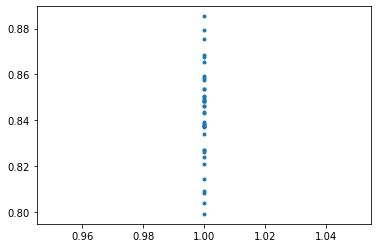

In [79]:
#plt.plot(df['gamma'],df['% Men in J'],".")
#plt.plot(df['gamma'],df['% Men in M'],".")
plt.plot(df['gamma'],df['% Men in S'],".")
#plt.plot(df['gamma'],df['% Men in E'],".")

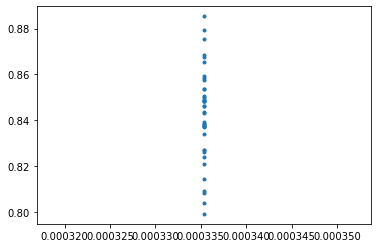

In [78]:
#plt.plot(df['bias'],df['% Men in J'],'.')
#plt.plot(df['alpha'],df['% Men in M'],'.')
#plt.plot(df['bias'],df['% Men in M'],'.')
plt.plot(df_nb['bias'],df_nb['% Men in S'],'.')
#plt.plot(df['bias'],df['% Men in E'],'.')

In [80]:
df[['alpha','gamma']].head()

,alpha,gamma
0,-8.0,1.0
1,-8.0,1.0
2,-8.0,1.0
3,-8.0,1.0
4,-8.0,1.0


In [70]:
model = sm.OLS(df['% Men in S'], sm.add_constant(df[['bias','gamma']])).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             % Men in S   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                 -0.015
Method:                 Least Squares   F-statistic:                    0.8151
Date:                Mon, 11 Dec 2023   Prob (F-statistic):              0.455
Time:                        09:29:58   Log-Likelihood:                 60.899
No. Observations:                  26   AIC:                            -115.8
Df Residuals:                      23   BIC:                            -112.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8789      0.019     47.132      0.000       0.840       0.917
bias          -0.0268      0.026     -1.016      0.320      -0.081       0.028
gamma         -0.0011      0.001     -0.742      0.466      -0.004       0.002
==============================================================================
Omnibus:                        5.029   Durbin-Watson:                   2.110
Prob(Omnibus):                  0.081   Jarque-Bera (JB):                3.369
Skew:                          -0.843   Prob(JB):                        0.185
Kurtosis:                       3.514   Cond. No.                         50.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
alpha_model = sm.OLS(df['% Men in S'], sm.add_constant(df['bias'])).fit()
alpha_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             % Men in S   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.101
Date:                Mon, 11 Dec 2023   Prob (F-statistic):              0.305
Time:                        09:30:07   Log-Likelihood:                 60.592
No. Observations:                  26   AIC:                            -117.2
Df Residuals:                      24   BIC:                            -114.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8714      0.016     55.905      0.000       0.839       0.904
bias          -0.0274      0.026     -1.049      0.305      -0.081       0.027
==============================================================================
Omnibus:                        4.954   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.084   Jarque-Bera (JB):                3.190
Skew:                          -0.794   Prob(JB):                        0.203
Kurtosis:                       3.650   Cond. No.                         7.24
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

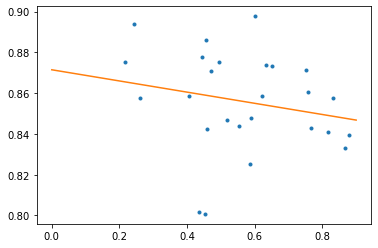

In [72]:
#plt.plot(df['alpha'],df['% Men in E'],".")
X = np.arange(0,1,0.1)
Y = alpha_model.params[0] + alpha_model.params[1]*X

plt.plot(df['bias'],df['% Men in S'],".")
plt.plot(X,Y)

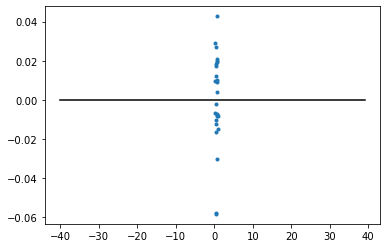

In [73]:
plt.plot(df['bias'],alpha_model.resid,".")
plt.plot(np.arange(-40,40,1),np.zeros(80),color='black')

In [74]:
model = sm.OLS(df['% Men in M'], sm.add_constant(df['gamma'])).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             % Men in M   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.033
Method:                 Least Squares   F-statistic:                    0.2074
Date:                Mon, 11 Dec 2023   Prob (F-statistic):              0.653
Time:                        09:30:24   Log-Likelihood:                 77.876
No. Observations:                  26   AIC:                            -151.8
Df Residuals:                      24   BIC:                            -149.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7659      0.006    130.382      0.000       0.754       0.778
gamma         -0.0003      0.001     -0.455      0.653      -0.002       0.001
==============================================================================
Omnibus:                        1.969   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.374   Jarque-Bera (JB):                1.311
Skew:                          -0.289   Prob(JB):                        0.519
Kurtosis:                       2.065   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""